# Nama      : Brian Mohamad Safiudin
# NIM       : 2141720133
# Kelas     : TI - 3F

---
# **Praktikum 1 Pertemuan 3**

---
# **Langkah 1 - Persiapan Data**
Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV

---
# **Langkah 2 - Import Library**

In [1]:
# import package
import numpy as np
import pandas as pd

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

---
# **Langkah 3 - Baca Data**

In [2]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

Baca data dari file CSV dengan menggunakan Pandas.

---
# **Langkah 4 - Pemahaman Terhadap Data**

In [3]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

---
# **Langkah 5 - Visualisasi Data**

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


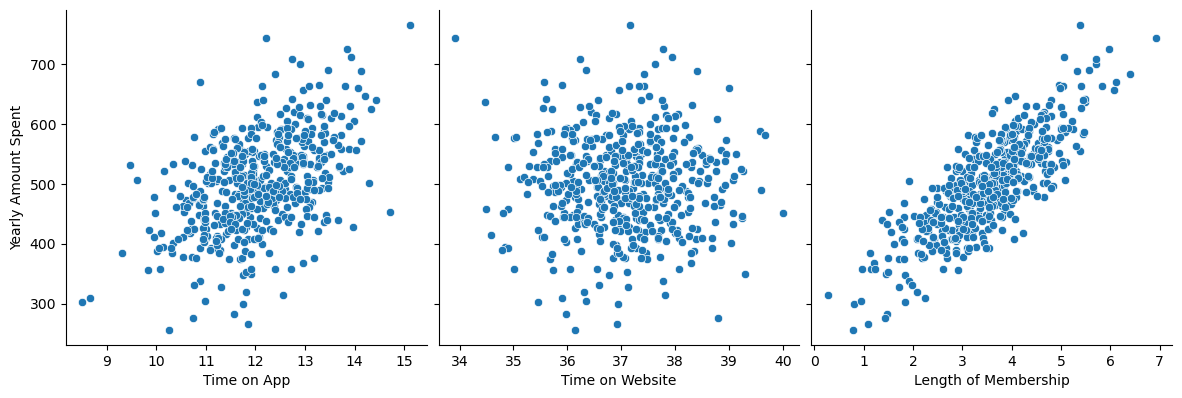

In [5]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

C:\Users\user\AppData\Local\Temp\ipykernel_1468\1286170800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


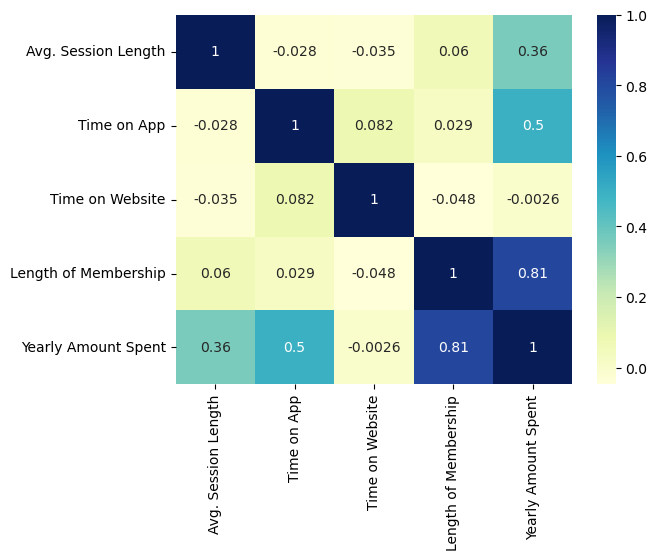

In [6]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

---
# **Langkah 6 - Regresi Linear**

In [7]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Pisahkan variabel bebas (X) dan variabel target (y).

In [8]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.
Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [9]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualisasikan garis regresi pada data latih.

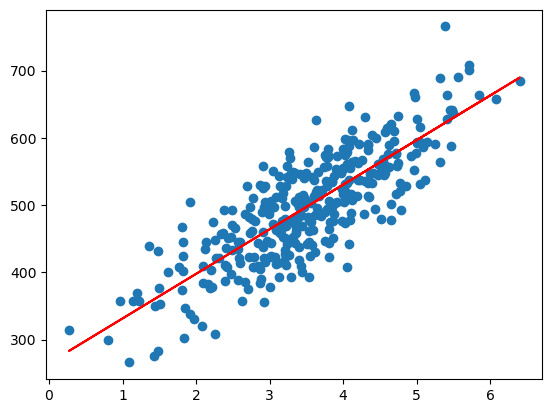

In [10]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

---
# **Langkah 7 - Analisis Residual**

In [11]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

C:\Users\user\AppData\Local\Temp\ipykernel_1468\594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


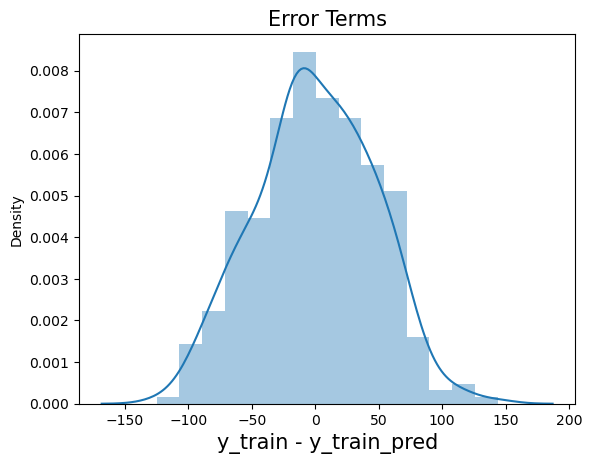

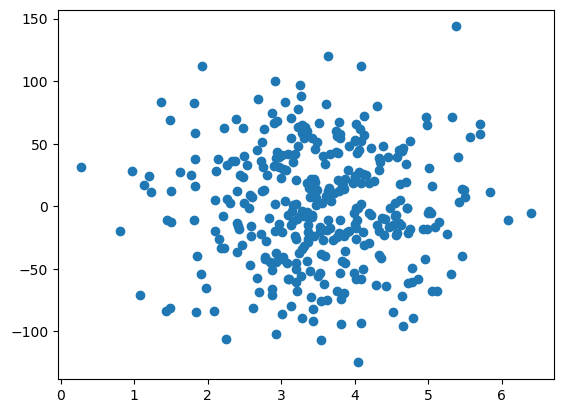

In [12]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

---
# **Langkah 8 - Prediksi Data Uji dan Evaluasi Model**

In [13]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Lakukan prediksi pada data uji.

In [14]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

---
# **Langkah 9 - Visualisasi Hasil**

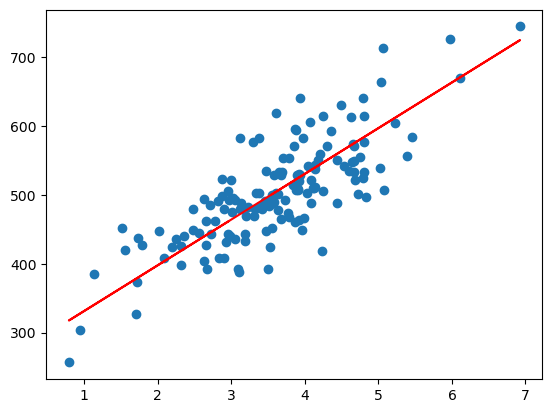

In [15]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

---
# **Praktikum 2 Pertemuan 3**

---
# **Langkah 1 - Mengimpor Library**
Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [16]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
# **Langkah 2 - Mengimpor Dataset**
Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.
Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y)

In [17]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

---
# **Langkah 3 - Feature Scaling**
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

---
# **Langkah 4 - Fitting SVR ke Dataset**
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [19]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

---
# **Langkah 5 - Visualisasi Hasil SVR**
langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

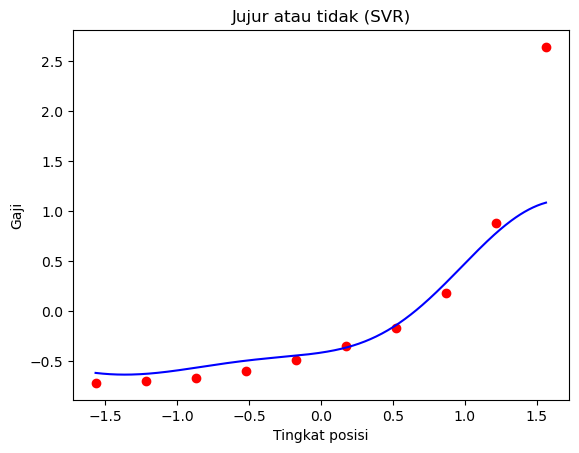

In [20]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

---
# **Langkah 6 - Prediksi Hasil**
Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
Menskalakan fitur prediksi menggunakan sc_X.transform.
Melakukan prediksi menggunakan model SVR yang telah dilatih.
Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [21]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

---
# **Langkah 7 - Menampilkan Hasil**
Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [22]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


---
# **Langkah 8 - Validasi Hasil**

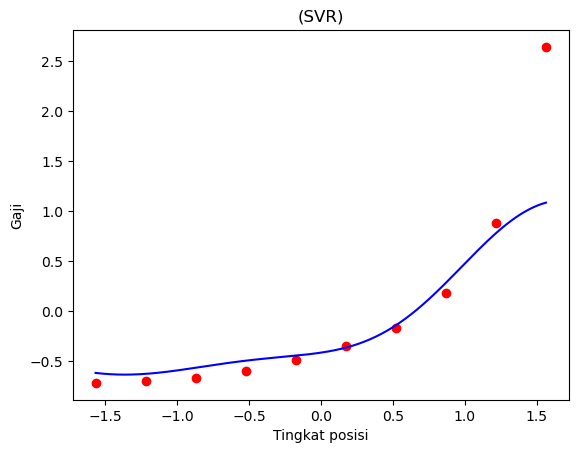

In [23]:
# Menampilkan hasil
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]

Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

# **Grafik SVR**

Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.
Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.

Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar $170,370.02. Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.

Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.

---
# **Langkah 9 - Evaluasi Model SVR**
Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [24]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


---
## **Tugas Praktikum Regresi**
---
### Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

## Intruksi Umum
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.


In [25]:
# import package
import numpy as np
import pandas as pd

# baca data
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


---
## **Multiple Linear Regression**

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

**Variabel Bebas (Fitur)**

1. Age (Usia) : faktor yang dapat memengaruhi biaya medis seseorang karena biaya perawatan medis biasanya cenderung meningkat seiring bertambahnya usia.

2. Sex (Jenis Kelamin) : Jenis kelamin bisa menjadi fitur, meskipun pengaruhnya mungkin tidak sebesar faktor-faktor lainnya.

3. BMI (Body Mass Index) : Indeks massa tubuh adalah ukuran yang mencerminkan komposisi tubuh seseorang.

4. Children (Jumlah Anak) : Jumlah anak dalam keluarga dapat memengaruhi biaya medis

5. Smoker (Perokok) : Status perokok atau bukan bisa memengaruhi biaya medis.

6. Region (Wilayah) : Wilayah geografis tempat seseorang tinggal juga bisa memengaruhi biaya medis

**Variabel Target**

1. Charges (Biaya Medis Personal) : variabel yang ingin diprediksi atau dianalisis

In [26]:
# Identifikasi variabel bebas (fitur) dan variabel target:
# Ukuran dari data
data.shape

# Info data
data.info()

# Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. data.shape: Perintah ini digunakan untuk mendapatkan dimensi (jumlah baris dan kolom) dari DataFrame data. Hasilnya akan memberikan informasi tentang ukuran data.

2. data.info(): Ini memberikan informasi tambahan tentang dataset seperti tipe data, jumlah nilai non-null, dan penggunaan memori. Berguna untuk memeriksa apakah ada nilai yang hilang dalam dataset.

3. data.describe(): Perintah ini memberikan statistik deskriptif untuk setiap kolom numerik dalam dataset seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum. Berguna untuk mendapatkan pemahaman awal tentang distribusi data.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


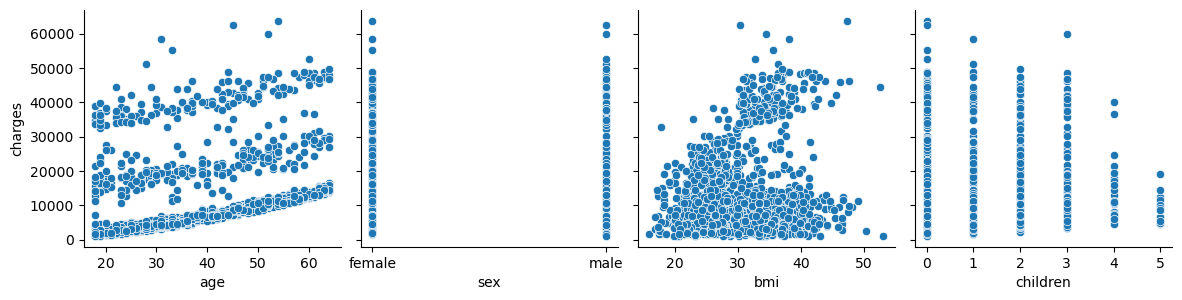

In [27]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# Operasi visualisasi
sns.pairplot(data, x_vars=['age', 'sex', 'bmi','children'],
             y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

1. import matplotlib.pyplot as plt dan import seaborn as sns: Dua pustaka Python digunakan untuk visualisasi data, yaitu Matplotlib dan Seaborn.

2. sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children'], y_vars='charges', size=3, aspect=1, kind='scatter'): Ini adalah perintah untuk membuat scatter plot (diagram titik) dari hubungan antara variabel independen ('age', 'sex', 'bmi', 'children') dan variabel target 'charges'. Hasilnya akan menunjukkan sejauh mana variabel independen memengaruhi variabel target. size, aspect, dan kind adalah argumen tambahan yang digunakan untuk mengatur tampilan plot.

3. plt.show(): Ini adalah perintah untuk menampilkan plot yang telah dibuat.

---
### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Memproses data terlebih dahulu, misalnya mengkodekan variabel 'perokok'
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Pilih variabel independen dan variabel target
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. from sklearn.linear_model import LinearRegression: Kode ini mengimpor kelas LinearRegression dari pustaka Scikit-Learn (sklearn), yang akan digunakan untuk membangun model regresi linear.

2. from sklearn.model_selection import train_test_split: Kode ini mengimpor fungsi train_test_split dari Scikit-Learn. Fungsi ini digunakan untuk membagi dataset menjadi dua bagian, yaitu set pelatihan dan set pengujian.

3. from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error: Kode ini mengimpor beberapa metrik evaluasi yang akan digunakan untuk mengukur kinerja model regresi linear, seperti mean squared error (MSE), R-squared (R2), dan mean absolute error (MAE).

4. data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0}): Kode ini mengubah variabel 'smoker' yang berisi nilai 'yes' dan 'no' menjadi nilai biner, yaitu 1 untuk 'yes' dan 0 untuk 'no'. Ini diperlukan karena model regresi linear membutuhkan input numerik.

5. X = data[['age', 'bmi', 'children', 'smoker']] dan y = data['charges']: Kode ini memilih variabel independen (X) dan variabel target (y) dari DataFrame data. Variabel independen terdiri dari 'age' (usia), 'bmi' (Body Mass Index), 'children' (jumlah anak), dan 'smoker' (apakah seseorang perokok atau bukan). Variabel target adalah 'charges' (biaya asuransi).

6. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Kode ini membagi data menjadi set pelatihan (X_train dan y_train) dan set pengujian (X_test dan y_test). Pengujian dilakukan dengan mengambil 20% data sebagai set pengujian, dan argumen random_state digunakan untuk memastikan hasil pengujian yang konsisten jika kode dijalankan ulang. Set pelatihan akan digunakan untuk melatih model, sedangkan set pengujian akan digunakan untuk menguji kinerja model.

---
### 3. Lakukan feature scaling jika diperkukan.

Feature scaling menggunakan StandardScaler dari library sklear, preprocessing. Melakukan scaling pada data numerik tunggal (X dan y) yang kemungkinan besar adalah salah satu fitur atau target dalam analisis regresi. Dalam kasus ini, dataset insurance, tidak ada variabel yang disebut X atau y.

---
### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [29]:
# Membuat dan melatih model regresi linier berganda
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

1. model = LinearRegression(): Kode ini membuat objek model regresi linear dengan menggunakan kelas LinearRegression yang telah diimpor sebelumnya dari Scikit-Learn. Objek model ini akan digunakan untuk mempelajari hubungan antara variabel independen (X_train) dan variabel target (y_train) dalam data pelatihan.

2. model.fit(X_train, y_train): Kode ini melatih model regresi linear menggunakan data pelatihan (X_train adalah variabel independen, dan y_train adalah variabel target). Proses pelatihan ini melibatkan pencarian koefisien (bobot) yang optimal untuk setiap variabel independen agar model dapat memprediksi y_train dengan baik. Dalam hal ini, model akan mencoba memahami hubungan antara usia (age), Body Mass Index (bmi), jumlah anak (children), dan status perokok (smoker) dengan biaya asuransi (charges).

---
### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [30]:
# Buatlah prediksi pada set tes
y_pred = model.predict(X_test)

y_pred = model.predict(X_test): Kode ini memanggil metode predict() pada objek model model. Metode ini digunakan untuk membuat prediksi berdasarkan variabel independen yang diberikan sebagai argumen, dalam hal ini X_test. Hasil prediksi akan disimpan dalam variabel y_pred.

---
### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

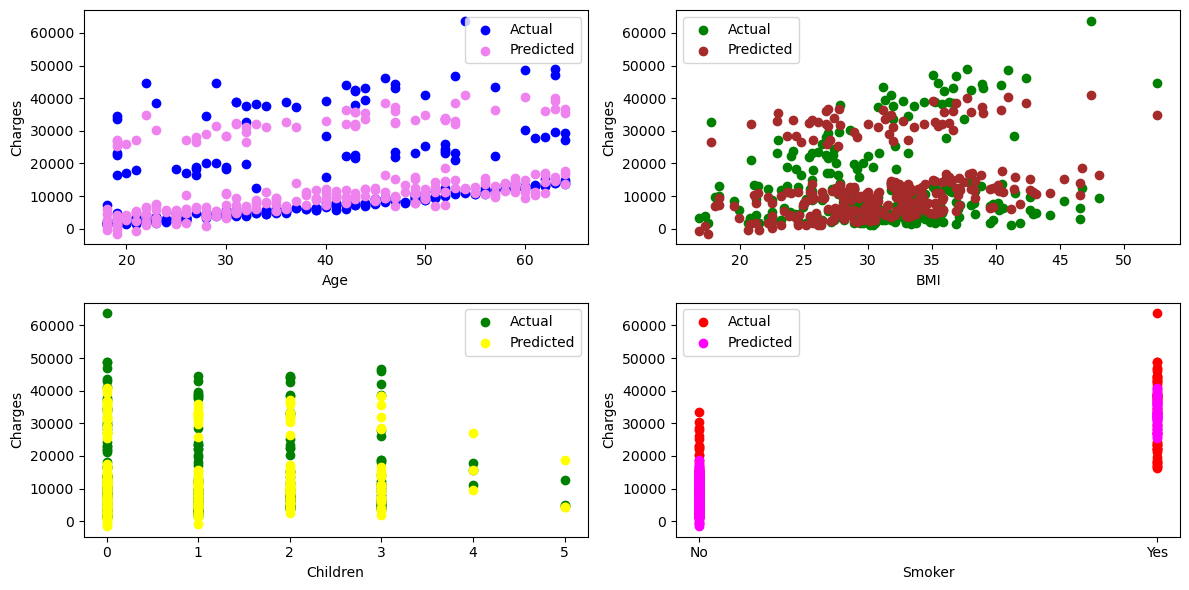

Mean Squared Error (MSE): 33981653.95019776
R-squared: 0.7811147722517886
Mean Absolute Error (MAE): 4213.798594527248


In [31]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='violet', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(X_test['bmi'], y_test, color='green', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='brown', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'children' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(X_test['children'], y_test, color='green', label='Actual')
plt.scatter(X_test['children'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 4)
plt.scatter(X_test['smoker'], y_test, color='red', label='Actual')
plt.scatter(X_test['smoker'], y_pred, color='magenta', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

1. mse = mean_squared_error(y_test, y_pred): Kode ini menggunakan fungsi mean_squared_error dari Scikit-Learn untuk menghitung Mean Squared Error (MSE) antara nilai yang sebenarnya (y_test) dan hasil prediksi (y_pred). MSE mengukur seberapa baik model memprediksi variabel target dengan mengukur rata-rata kuadrat perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah MSE, semakin baik kinerja model.

2. r2 = r2_score(y_test, y_pred): Kode ini menggunakan fungsi r2_score dari Scikit-Learn untuk menghitung R-squared (R2) antara nilai sebenarnya (y_test) dan hasil prediksi (y_pred). R2 mengukur seberapa baik model sesuai dengan data. Nilai R2 berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya.

3. mae = mean_absolute_error(y_test, y_pred): Kode ini menggunakan fungsi mean_absolute_error dari Scikit-Learn untuk menghitung Mean Absolute Error (MAE) antara nilai sebenarnya (y_test) dan hasil prediksi (y_pred). MAE mengukur rata-rata dari nilai absolut perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah MAE, semakin baik model.

4. Selanjutnya, kode melakukan visualisasi hasil prediksi dengan menggunakan matplotlib. Ini termasuk empat scatter plot yang membandingkan variabel independen ('age', 'bmi', 'children', 'smoker') dengan variabel target ('charges') untuk data aktual (warna biru) dan hasil prediksi (warna ungu atau kuning, tergantung dari plot mana). Setiap subplot menunjukkan hubungan antara satu variabel independen dengan variabel target.

5. Terakhir, kode mencetak nilai MSE, R2, dan MAE ke layar. Ini memberikan gambaran tentang kinerja model dalam memprediksi biaya asuransi berdasarkan variabel independen yang dipilih. Semakin rendah MSE dan MAE, dan semakin tinggi R2, semakin baik kinerja modelnya.